In [78]:
import pandas as pd
import os
import seaborn
from datetime import datetime
import time

out_folder = "out_test"

In [79]:
# TODO read in dataframes from the compiled data files

user_info_cohort-15_1730666309.csv
user_info_cohort-14_1730666309.csv
user_leaderboard_1730666309.csv
user_leaderboard_1730666309_clean.csv
records_cohort-14_1730666309.csv
user_info_cohort-13_1730666309.csv
records_cohort-15_1730666309.csv
records_cohort-13_1730666309.csv


In [80]:
# construct more attributes
record_df["kps"] = record_df["inputs"] / record_df["final_time"] # keys per second
record_df["kpp"] = record_df["inputs"] / record_df["pieces_placed"] # keys per piece
record_df["percent_perf"] = record_df["finesse_perf"] / record_df["pieces_placed"] # percent of pieces placed with perfect finesse
# TODO figure out how the finesse percentage is calcualted

In [81]:
user_df["time_played"] = user_df["created_date"].apply(lambda x: time.time() - datetime.fromisoformat(x).timestamp()) # time since account creation

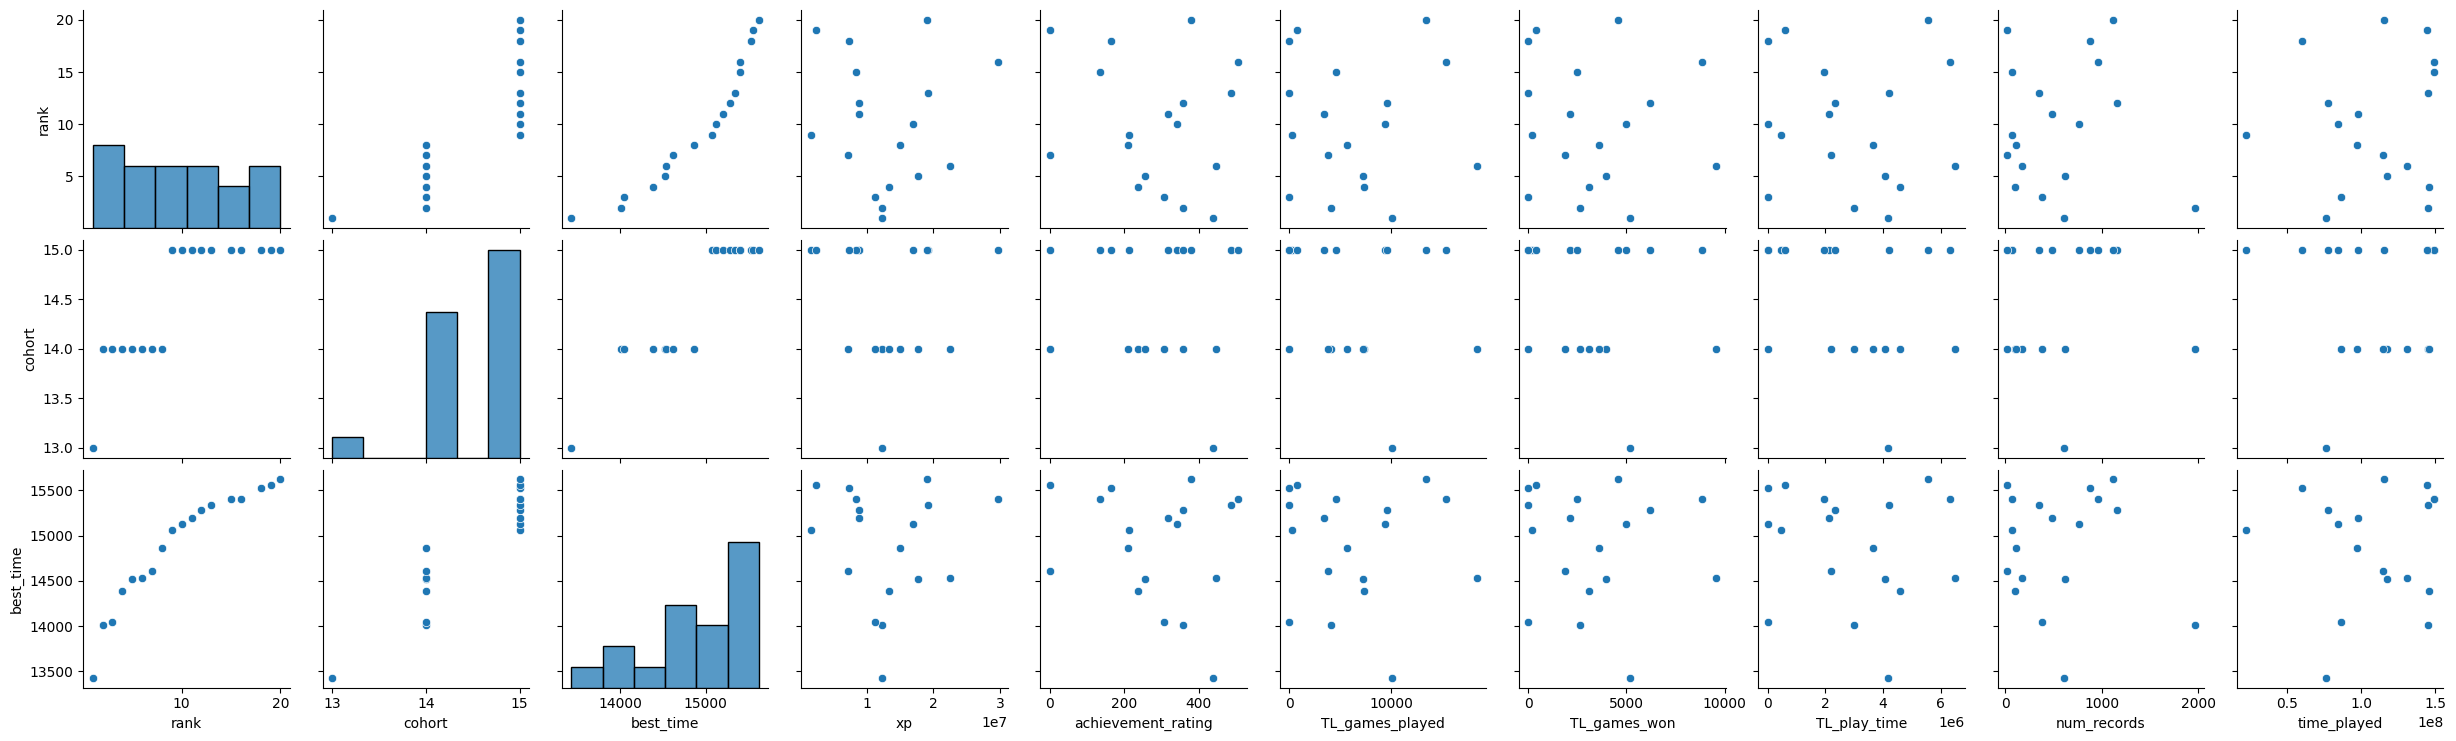

In [82]:
seaborn.pairplot(user_df, y_vars=["rank", "cohort", "best_time"])

<Axes: >

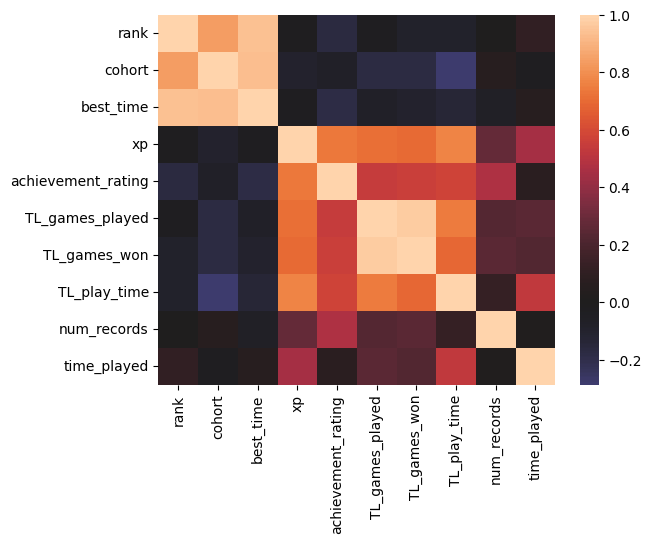

In [83]:
seaborn.heatmap(user_df.corr(numeric_only=True), cmap="icefire", center=0)

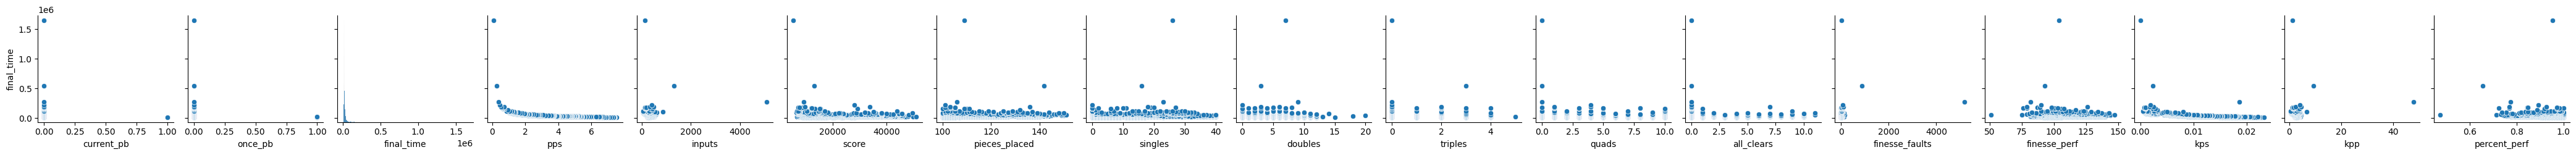

In [84]:
seaborn.pairplot(record_df, y_vars=["final_time"])

<Axes: >

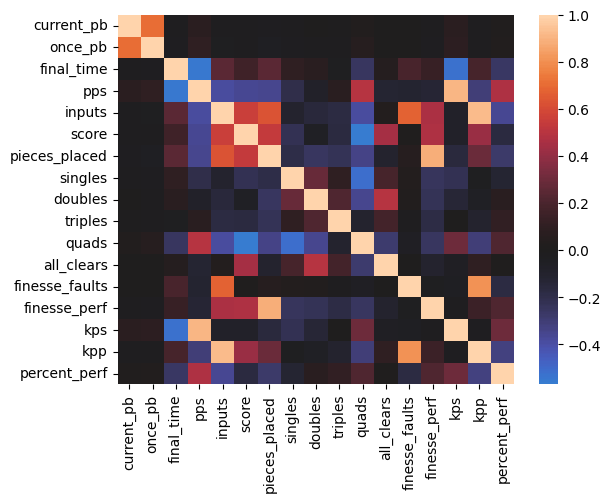

In [85]:
seaborn.heatmap(record_df.corr(numeric_only=True), cmap="icefire", center=0)